In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.decomposition import PCA

%matplotlib inline

In [27]:
features = ["1", "2", "3", "4", "5", "6", "7", "8", 
            "9", "10", "11", "12", "13", "14", "15", 
            "16", "category"]
digits = pd.read_csv("/home/haiqw/Documents/my_projects/iforest/test/pendigits.tra", 
                     delimiter=",", header=None, names=features)
print ("Description of the Abalone Dataset")
digits.describe()

Description of the Abalone Dataset


1            2            3            4            5  \
count  7494.000000  7494.000000  7494.000000  7494.000000  7494.000000   
mean     37.384307    84.679343    40.005604    82.889512    50.878303   
std      33.322024    16.848420    26.256025    19.638582    34.927201   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       5.000000    76.000000    20.000000    70.000000    17.000000   
50%      31.000000    89.000000    39.000000    89.000000    56.000000   
75%      61.000000   100.000000    58.000000   100.000000    81.000000   
max     100.000000   100.000000   100.000000   100.000000   100.000000   

                 6            7            8            9           10  \
count  7494.000000  7494.000000  7494.000000  7494.000000  7494.000000   
mean     65.044436    51.471844    44.599680    57.129971    34.069122   
std      27.377341    30.680075    30.659478    33.680340    27.459989   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      48.000000    28.000000    22.000000    30.000000     7.000000   
50%      71.000000    54.000000    42.000000    60.000000    33.000000   
75%      86.000000    75.000000    65.000000    88.000000    55.000000   
max     100.000000   100.000000   100.000000   100.000000   100.000000   

                11           12           13           14           15  \
count  7494.000000  7494.000000  7494.000000  7494.000000  7494.000000   
mean     61.417401    35.782092    54.699760    35.800774    46.813718   
std      37.130762    27.495836    22.599781    33.223611    41.531794   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      25.000000    12.000000    41.000000     7.000000     0.000000   
50%      74.000000    32.000000    53.000000    28.000000    39.000000   
75%      98.000000    57.000000    69.000000    48.000000   100.000000   
max     100.000000   100.000000   100.000000   100.000000   100.000000   

                16     category  
count  7494.000000  7494.000000  
mean     28.565386     4.430878  
std      35.811094     2.876981  
min       0.000000     0.000000  
25%       0.000000     2.000000  
50%       8.000000     4.000000  
75%      51.000000     7.000000  
max     100.000000     9.000000

/usr/lib64/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


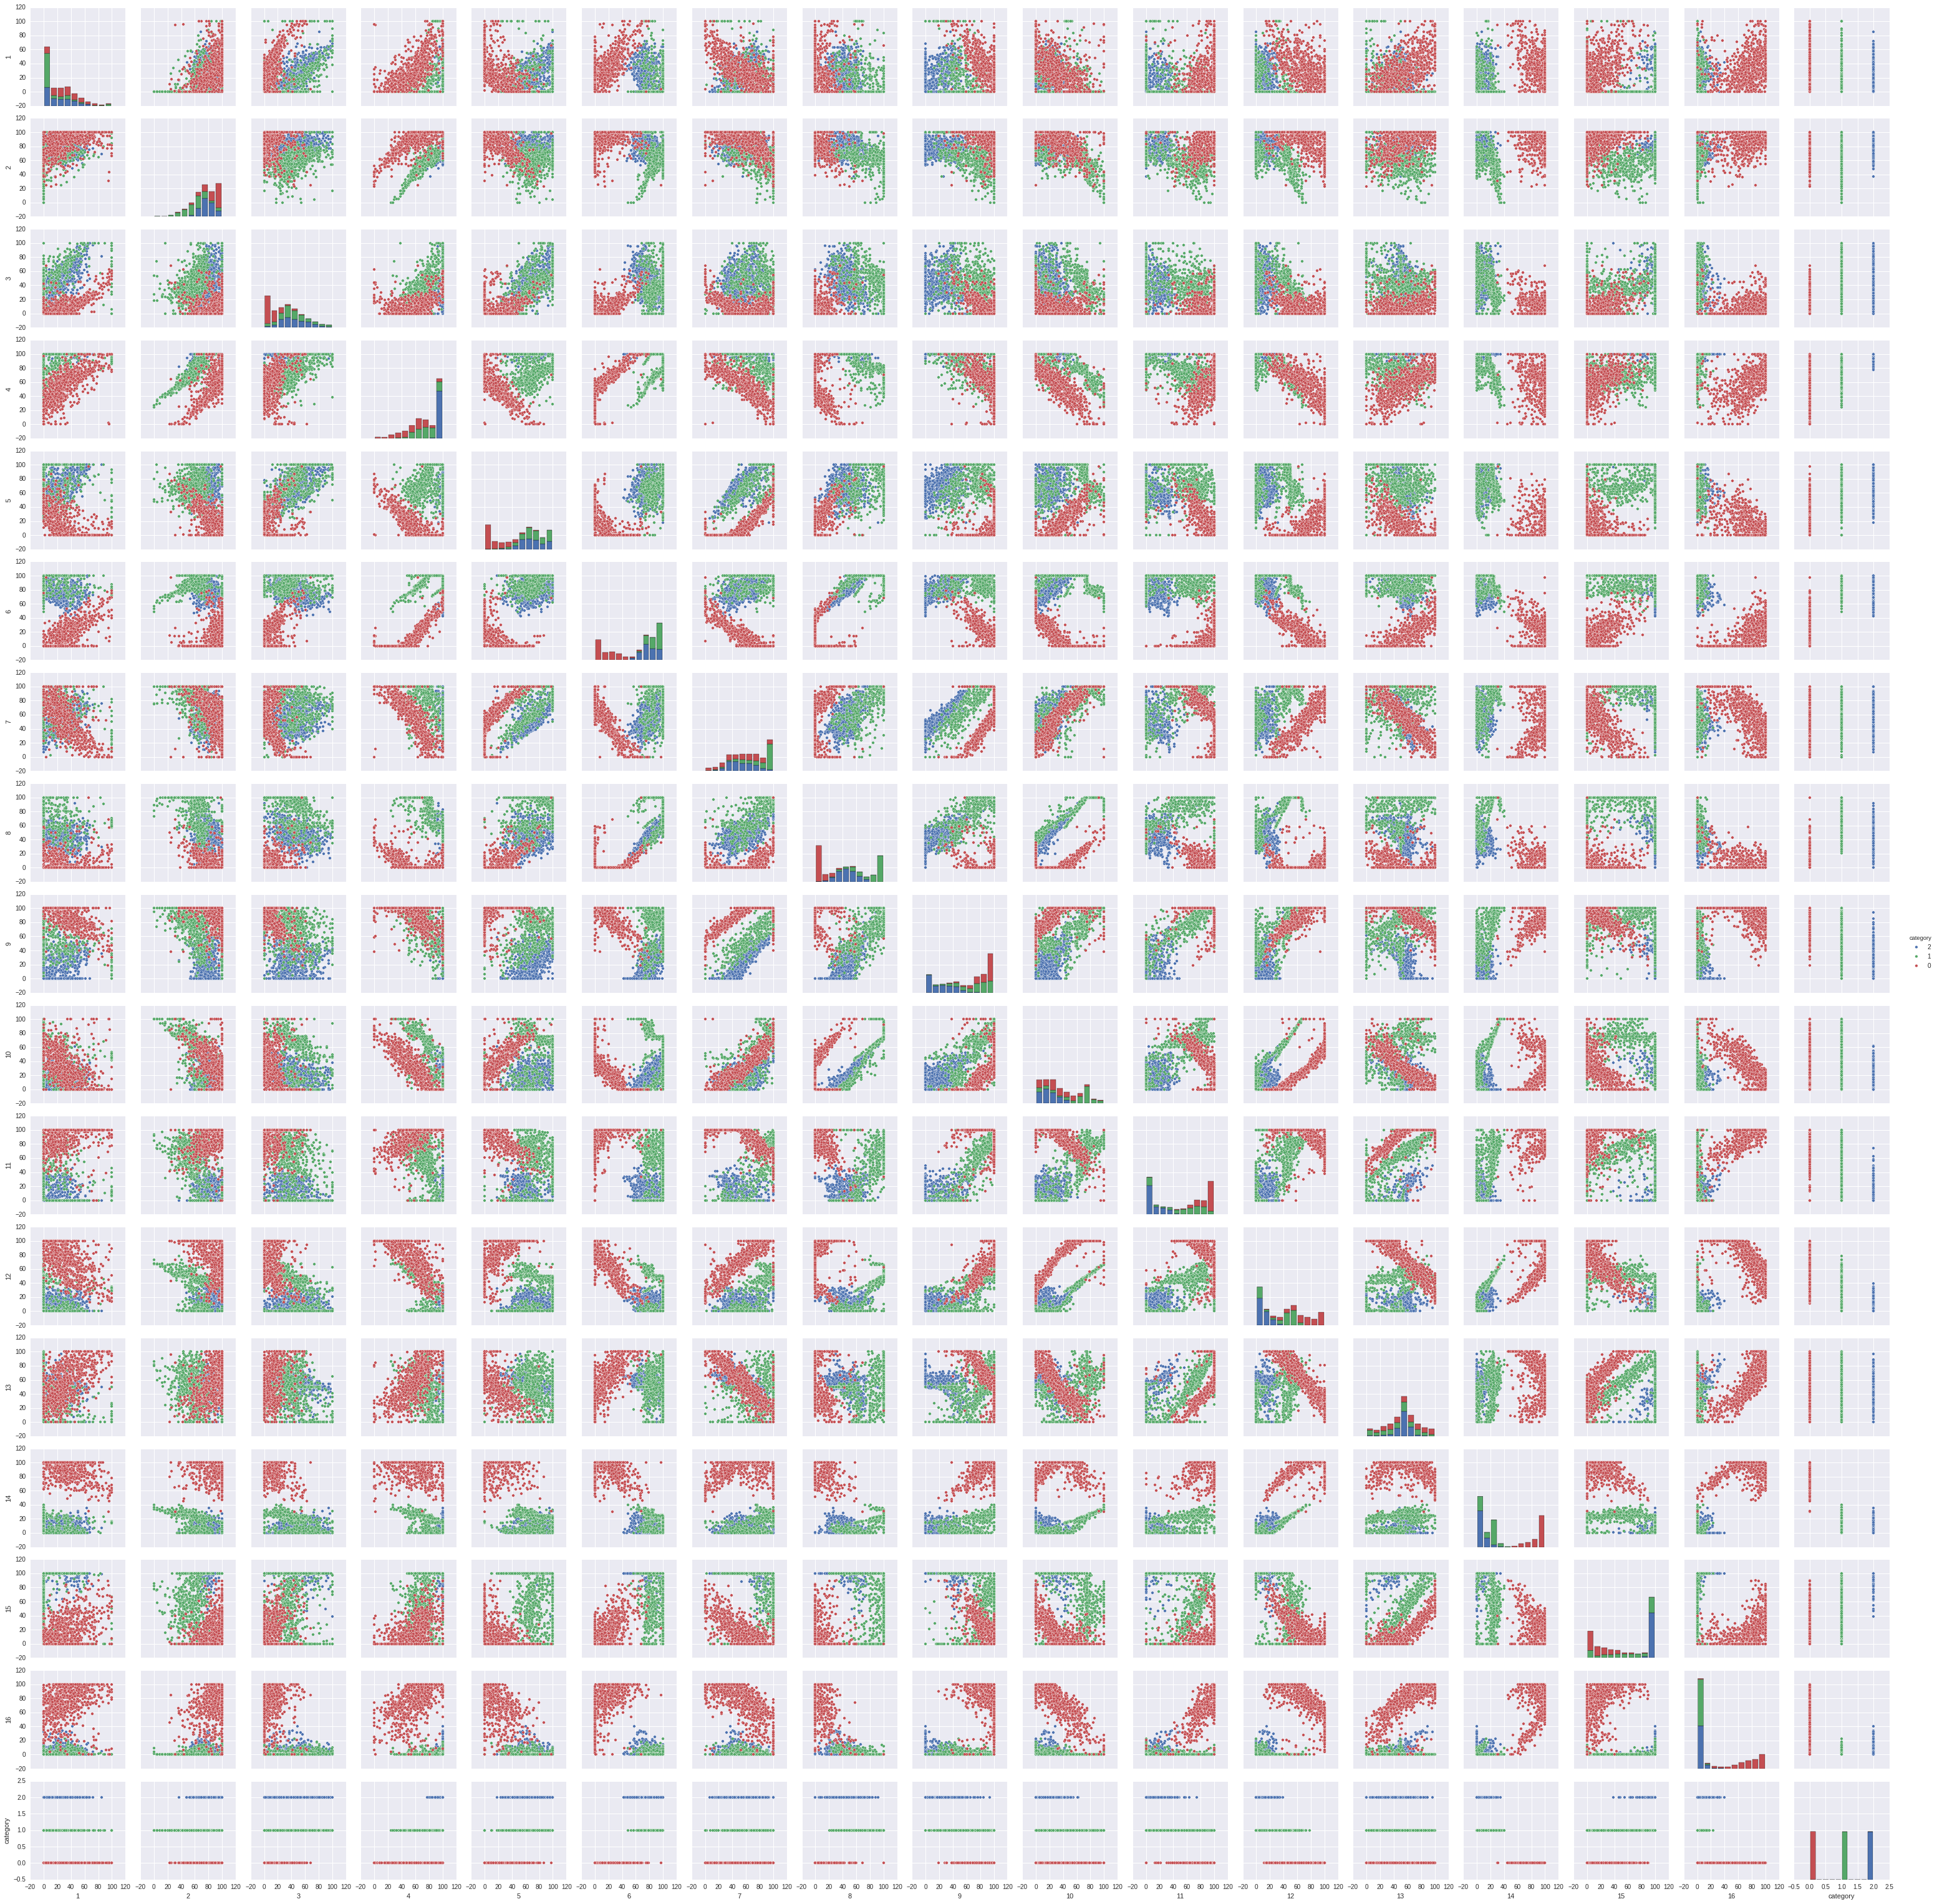

In [3]:
sns.set()
sns.pairplot(digits.query(" 0 <= category <= 2"), hue="category")

In [110]:
# subsampling
from sklearn.neighbors import NearestNeighbors
X = np.array(digits.query(" 0 <= category <= 2"))
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X[:, 0:X.shape[1]-1])
X_pca = np.append(X_pca, np.reshape(X[:, X.shape[1]-1], newshape=(X.shape[0],1)), axis=1)

label = 0
subcategory = X_pca[X_pca[:,X_pca.shape[1]-1] == label]
nbrs = NearestNeighbors(n_neighbors=100, algorithm='ball_tree').fit(subcategory[:, 0:subcategory.shape[1]-1])
distances, indices = nbrs.kneighbors(subcategory[:, 0:subcategory.shape[1]-1])

rare =  subcategory[indices[4]]
major =  X_pca[X_pca[:, X_pca.shape[1]-1] != label]
results = np.append(rare, major, axis=0)

np.savetxt(X=results, fname="/home/haiqw/Documents/my_projects/iforest/test/sub_digits.txt")

## Digits
> 数字0为稀有类，数字1和数字2共同构成主要类. Fsocre = 1

In [112]:
features = ["1", "2", "category"]
digits2 = pd.read_csv("/home/haiqw/Documents/my_projects/iforest/test/sub_digits.txt", delimiter="\s+", header=None, names=features)
print ("Description of the Abalone Dataset")
digits2.describe()

Description of the Abalone Dataset


1            2     category
count  1659.000000  1659.000000  1659.000000
mean    -50.562501     6.221491     1.409885
std      56.409861    62.496795     0.602206
min    -110.399839   -93.132894     0.000000
25%     -88.810857   -46.887543     1.000000
50%     -72.800713   -18.585331     1.000000
75%     -28.144825    79.585692     2.000000
max     145.869013   122.081817     2.000000

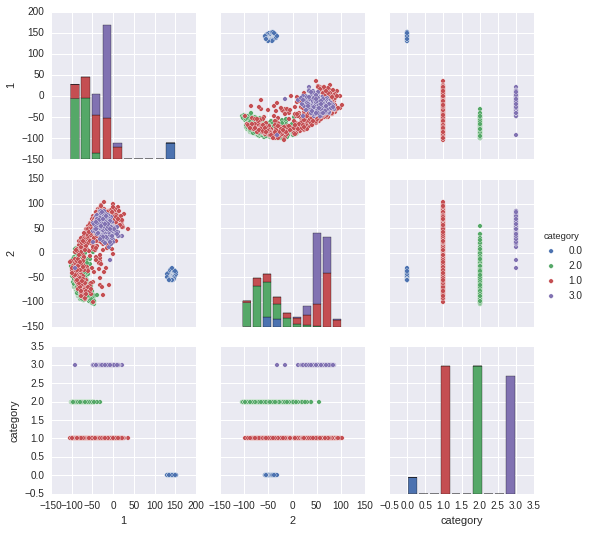

In [108]:
sns.set()
sns.pairplot(digits2, hue="category")

In [128]:
# kmeans
from sklearn.cluster import KMeans
filtering = np.loadtxt("/home/haiqw/Documents/my_projects/iforest/test/digits_filtering.txt")
indices = np.loadtxt("/home/haiqw/Documents/my_projects/iforest/test/digit_indices.txt")
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(filtering)

In [132]:
labels = kmeans_model.labels_
c = 0
for i in range(0, labels.size):
    if labels[i] == 1:
        c += 1
        # print (indices[i])

In [131]:
c

100